# Titanic survival Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### data visualization

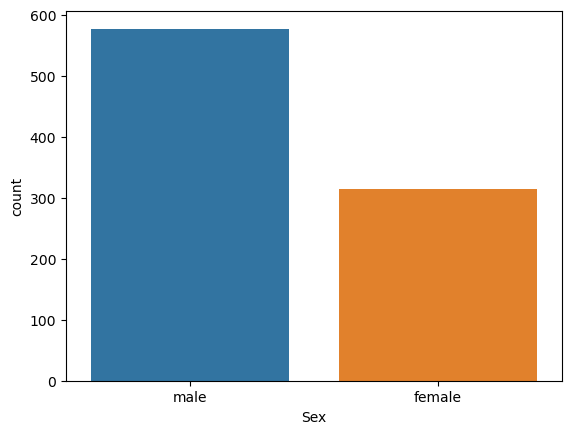

In [5]:
sb.countplot(x='Sex',data=df)
plt.show()

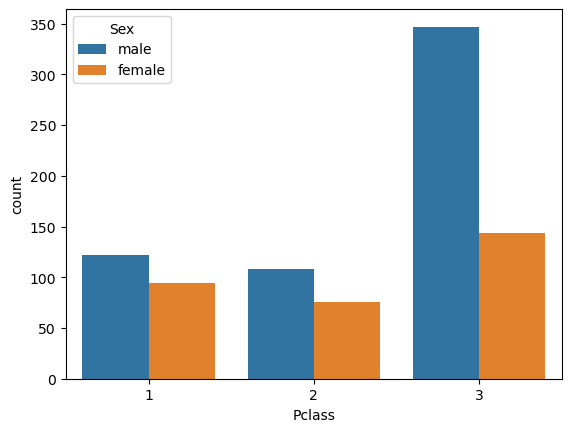

In [6]:
sb.countplot(x='Pclass',data=df, hue='Sex')
plt.show()

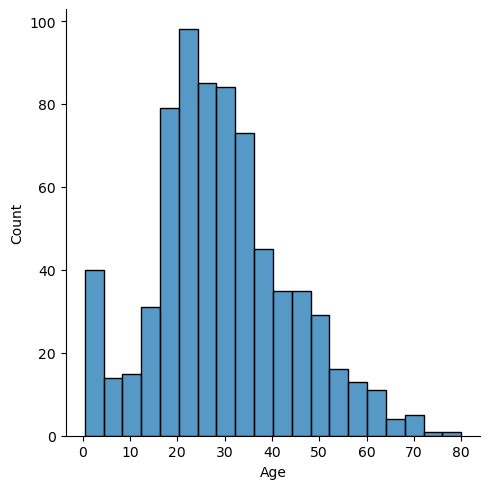

In [7]:
sb.displot(data=df['Age'],kde=False,bins=20)
plt.show()

In [8]:
df['Along']=df['SibSp']+df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
df['Along'].loc[df['Along']>0]=1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


### Factors for survival

<Axes: xlabel='Pclass', ylabel='count'>

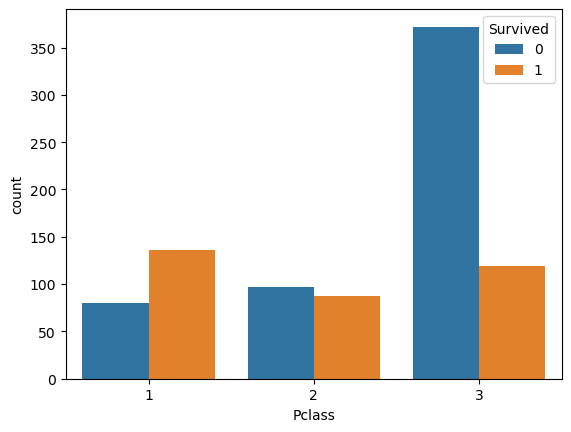

In [10]:
sb.countplot(x='Pclass',data=df,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

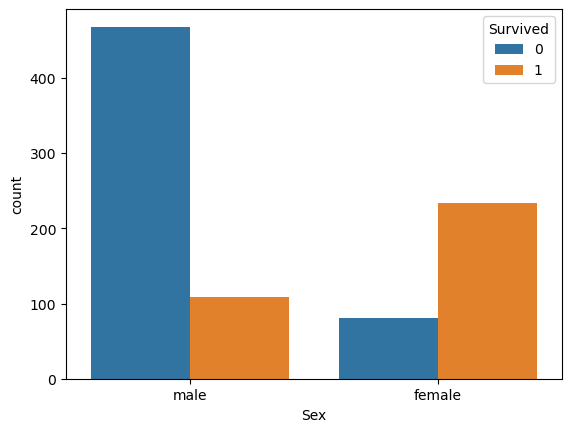

In [11]:
sb.countplot(x='Sex',data=df,hue='Survived')

### Data preparation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Along        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [14]:
df=df.drop(columns=['PassengerId','Name','Ticket','Embarked','Cabin'])

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,NaN,1,2,23.4500,1
889,1,1,male,26.0,0,0,30.0000,0


In [16]:
df['Sex'] = np.where(df['Sex']=='male',1,0)

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,NaN,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,0


<Axes: >

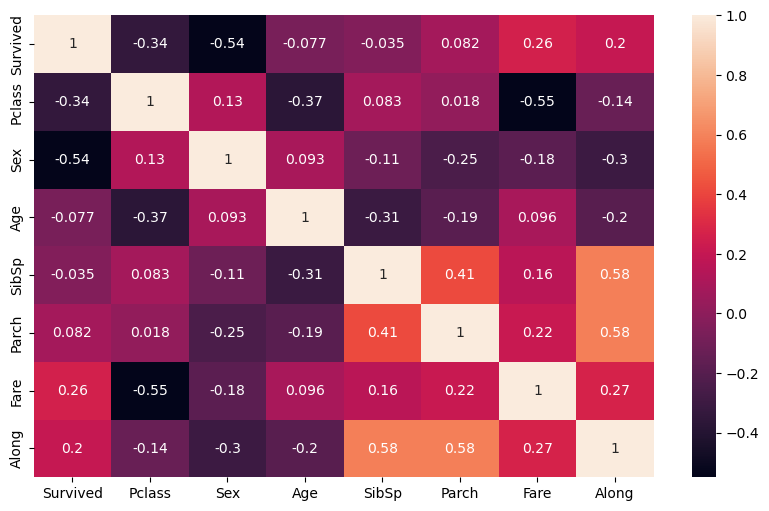

In [18]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),annot=True)

### Handling Missing values

In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Along         0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

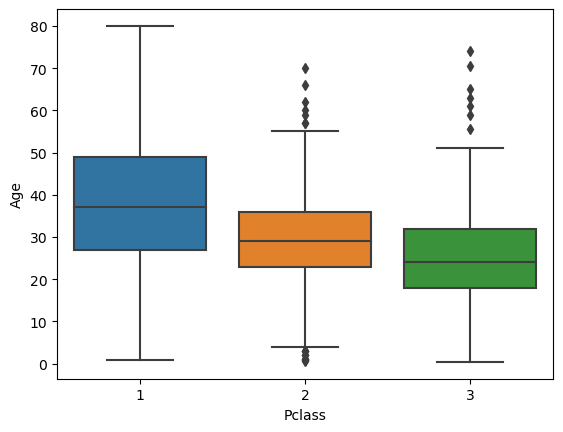

In [20]:
sb.boxplot(x='Pclass',y='Age',data=df)

In [21]:
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [22]:
def fill_age(row):
    age=row[0]
    pclass=row[1]
    if pd.isnull(age):
        if pclass==1:
            return 38.23
        elif pclass==2:
            return 29.87
        else:
            return 25.14
    else:
        return age

In [23]:
df['Age']=df[['Age','Pclass']].apply(fill_age,axis=1)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.00,1,0,7.2500,1
1,1,1,0,38.00,1,0,71.2833,1
2,1,3,0,26.00,0,0,7.9250,0
3,1,1,0,35.00,1,0,53.1000,1
4,0,3,1,35.00,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,0
887,1,1,0,19.00,0,0,30.0000,0
888,0,3,0,25.14,1,2,23.4500,1
889,1,1,1,26.00,0,0,30.0000,0


### Model building

In [27]:
X = df.drop(columns=['Survived'])
y=df['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [53]:
model.score(X_train,y_train)

0.8342696629213483

In [54]:
model.score(X_test,y_test)

0.8212290502793296

In [44]:
from sklearn.metrics import classification_report,f1_score

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [56]:
f1_score(y_test,y_pred)

0.7611940298507462

### visualizing the decision tree

In [58]:
from sklearn import tree

In [78]:
features = X.columns

In [79]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Along'], dtype='object')

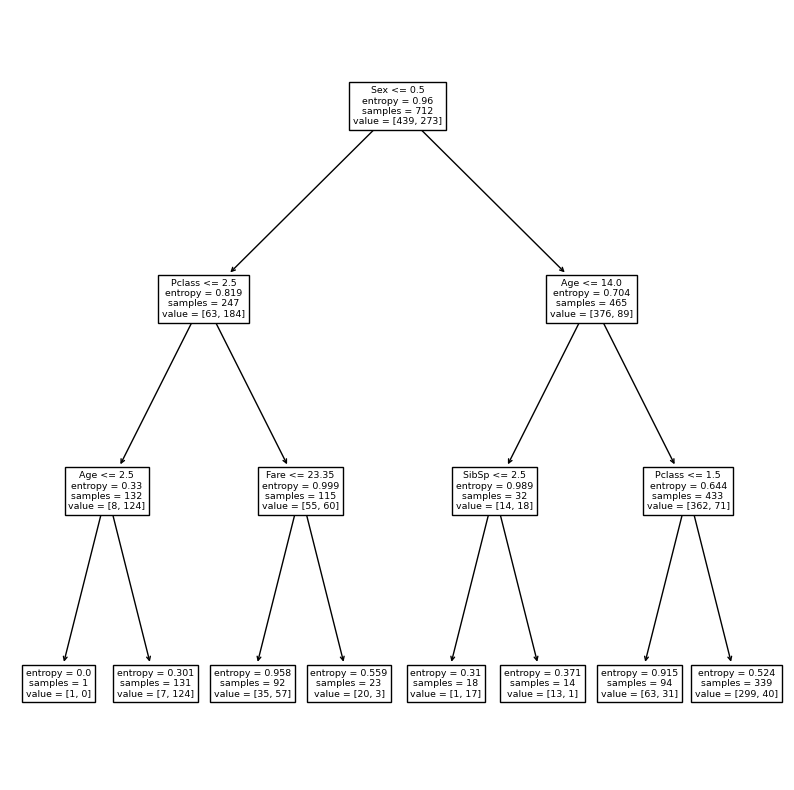

In [80]:
plt.figure(figsize=(10,10))
res = tree.plot_tree(model,feature_names=list(features))